## Notebook set up

**Your task**: Apply at least two different feature engineering techniques to the `housing_df` dataframe to improve the dataset. At the end of the notebook, your engineered dataset and the original dataset will be used to train a linear regression model to predict `MedHouseVal`. Your goal is to achieve better model performance via feature engineering.

**Note**: If you have read ahead or you are familiar with the basics of training ML models, no there is no train-test split and yes, this means data leakage/genralizability is a concern. We will cover those topics in the next unit. For now, the goal is to keep things simple while still giving you an idea of how your feature engineering effects model performance.

Before applying transformations, explore the dataset to understand what techniques would be most beneficial.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Set random seed for reproducibility
np.random.seed(315)

### Load dataset

In [2]:
# Load California housing dataset
original_housing_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')
housing_df = original_housing_df.copy()

## Task 1: Explore the dataset

Before deciding what feature engineering techniques to apply, explore the dataset to understand its characteristics.

**Things to investigate**:
- Display basic information about the dataset (`.info()`, `.describe()`)
- Check for missing values
- Examine feature distributions (histograms, box plots)
- Look at feature scales and ranges

Use this exploration to inform your feature engineering decisions in the following tasks.

In [3]:
# 1. Basic info
print("=== INFO ===")
housing_df.info()


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
print("\n=== DESCRIBE ===")
display(housing_df.describe())


=== DESCRIBE ===


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# 3. Check for missing values
print("\n=== MISSING VALUES ===")
print(housing_df.isnull().sum())


=== MISSING VALUES ===
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


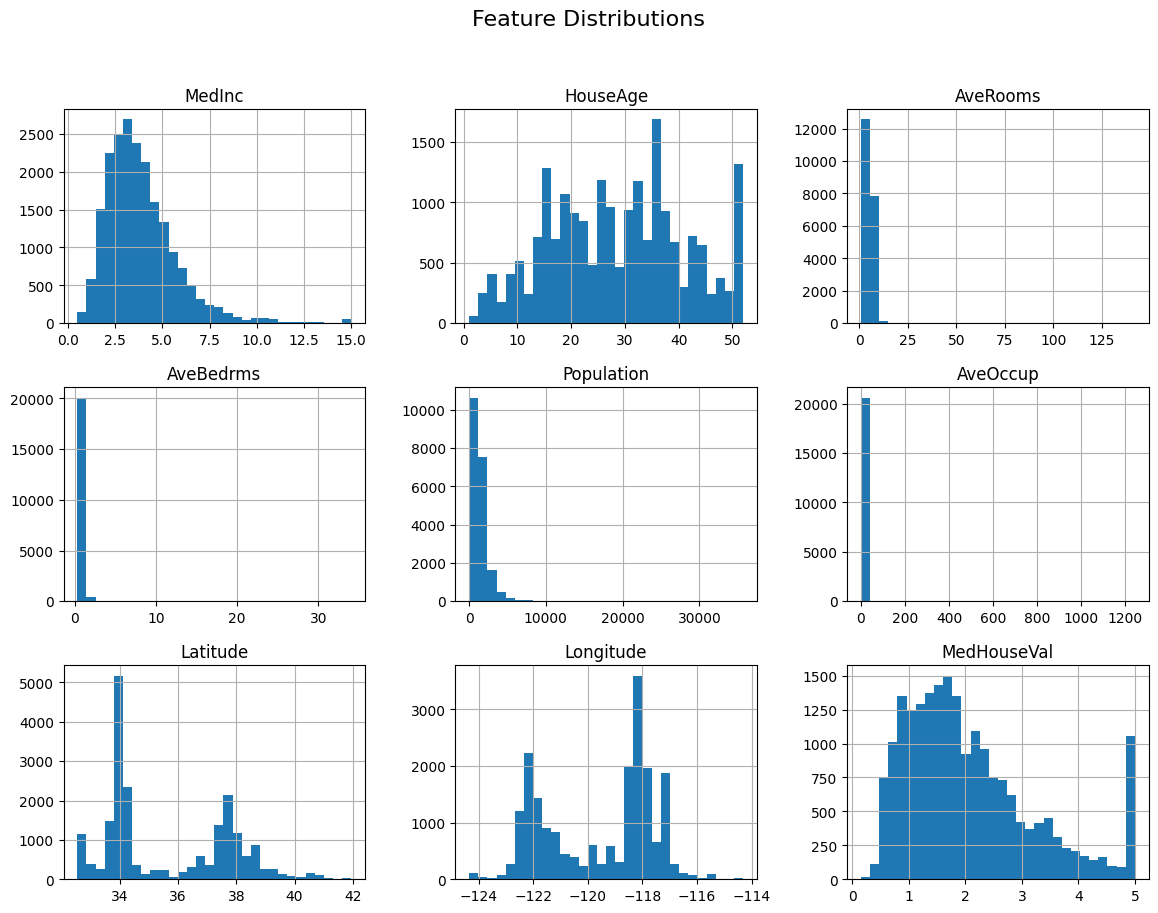

In [6]:
# 4. Histograms for feature distributions
housing_df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

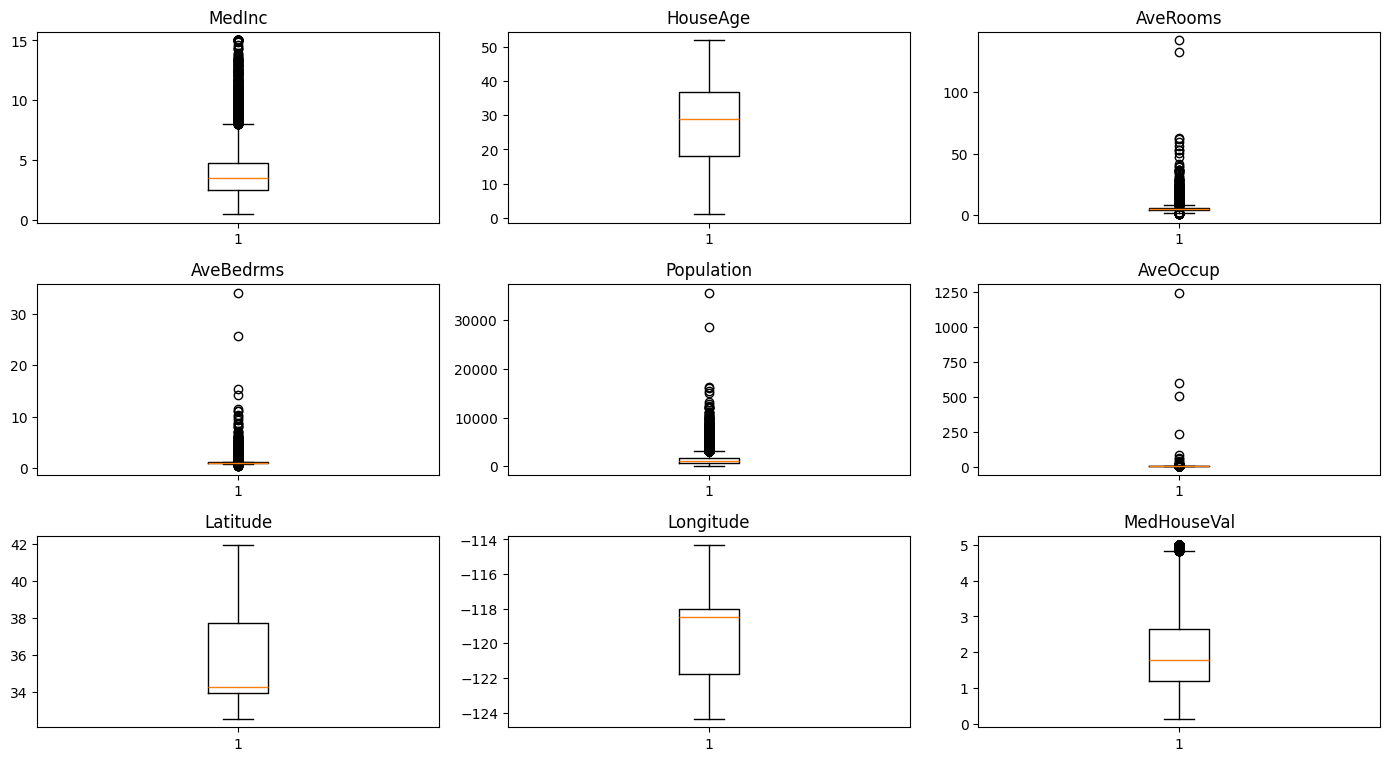

In [7]:
# 5. Boxplots to check for outliers/unusual ranges
plt.figure(figsize=(14, 10))
for i, col in enumerate(housing_df.columns):
    plt.subplot(4, 3, i+1)
    plt.boxplot(housing_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
# 6. Print min/max ranges
print("\n=== FEATURE RANGES (MIN–MAX) ===")
for col in housing_df.columns:
    print(f"{col}: min={housing_df[col].min():.2f}, max={housing_df[col].max():.2f}")


=== FEATURE RANGES (MIN–MAX) ===
MedInc: min=0.50, max=15.00
HouseAge: min=1.00, max=52.00
AveRooms: min=0.85, max=141.91
AveBedrms: min=0.33, max=34.07
Population: min=3.00, max=35682.00
AveOccup: min=0.69, max=1243.33
Latitude: min=32.54, max=41.95
Longitude: min=-124.35, max=-114.31
MedHouseVal: min=0.15, max=5.00


## Task 2: Apply your first feature engineering technique

Based on your exploration, apply your first feature engineering technique.

**Example approaches**:
- Transform skewed features using log, sqrt, power, or quantile transformations
- Create bins/categories from continuous variables
- Create interaction features (e.g., rooms per household = total rooms / households)

In [9]:
# Choose skewed features to transform
skewed_features = ['MedInc', 'AveOccup', 'Population']

# Create log-transformed versions (add 1 to avoid log(0))
for col in skewed_features:
    new_col = f"{col}_log"
    housing_df[new_col] = np.log1p(housing_df[col])

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_log,AveOccup_log,Population_log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.232720,1.268511,5.777652
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.230165,1.134572,7.784057
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.111110,1.335596,6.208590
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.893579,1.266369,6.326149
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.578195,1.157342,6.338594


## Task 3: Apply your second feature engineering technique

**Example approaches**:
- Scale features to similar ranges
- Encode any categorical variables you created
- Create aggregate statistics by groups

In [10]:
# Rooms per household
housing_df['RoomsPerHousehold'] = housing_df['AveRooms'] / housing_df['AveOccup']

# Bedrooms per room
housing_df['BedroomsPerRoom'] = housing_df['AveBedrms'] / housing_df['AveRooms']

# Population per household (density measure)
housing_df['PopPerHousehold'] = housing_df['Population'] / housing_df['AveOccup']

housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_log,AveOccup_log,Population_log,RoomsPerHousehold,BedroomsPerRoom,PopPerHousehold
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.232720,1.268511,5.777652,2.732919,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.230165,1.134572,7.784057,2.956685,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.111110,1.335596,6.208590,2.957661,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.893579,1.266369,6.326149,2.283154,0.184458,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.578195,1.157342,6.338594,2.879646,0.172096,259.0


## (Optional) Additional feature engineering

Add more techniques if you'd like to experiment further.
Distance from coast (approx proxy)

Latitude × Longitude interaction

Latitude^2, Longitude^2 (curvature for non-linear location effects)

These help linear regression approximate geography without using a map.

In [11]:
# Approximate distance from coast using longitude
# More negative longitude = closer to coast in CA
housing_df['DistFromCoast'] = housing_df['Longitude'].max() - housing_df['Longitude']

# Lat-Long interaction
housing_df['Lat_Long_Interaction'] = housing_df['Latitude'] * housing_df['Longitude']

# Non-linear location effects
housing_df['Latitude_sq'] = housing_df['Latitude'] ** 2
housing_df['Longitude_sq'] = housing_df['Longitude'] ** 2


In [12]:
### Additional Evaluation yeo-johnson

from sklearn.preprocessing import PowerTransformer

# Select columns you want to transform
cols_to_transform = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# Initialize transformer
transformer = PowerTransformer(method='yeo-johnson')

# Fit + transform
housing_df[cols_to_transform] = transformer.fit_transform(housing_df[cols_to_transform])

cols_to_transform = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

transformer = PowerTransformer(method='yeo-johnson')

transformed = transformer.fit_transform(housing_df[cols_to_transform])

# Add columns with suffix
for i, col in enumerate(cols_to_transform):
    housing_df[col + "_YJ"] = transformed[:, i]


## Model evaluation

Now we'll compare model performance on the original dataset versus your engineered dataset.

### Evaluate datasets

In [13]:
# Create output directory if it doesn't exist
from pathlib import Path

# Create output directory if it doesn't exist
output_directory = 'data/outputs'
Path(output_directory).mkdir(parents=True, exist_ok=True)

# Save a copy of the engineered dataframe
housing_df.to_csv('data/outputs/housing_df.csv', index=False)

In [14]:
# Create linear regression model
model = LinearRegression()

# Evaluate on original dataset
scores_original = cross_val_score(
    model,
    original_housing_df.drop('MedHouseVal', axis=1),
    original_housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

# Evaluate on engineered dataset
scores_engineered = cross_val_score(
    model,
    housing_df.drop('MedHouseVal', axis=1),
    housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

engineered_mean = scores_engineered.mean()
original_mean = scores_original.mean()
mean_improvement = (engineered_mean - original_mean) / original_mean

print(f'\nMean improvement: {mean_improvement:.2f}%')


Mean improvement: 0.18%


### Visualize model performance comparison

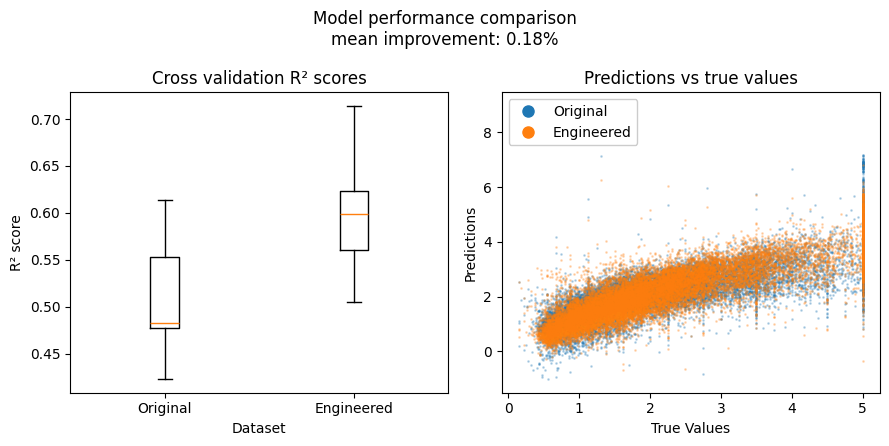

In [15]:
original_model = LinearRegression()
original_model.fit(original_housing_df.drop('MedHouseVal', axis=1), original_housing_df['MedHouseVal'])
original_predictions = original_model.predict(original_housing_df.drop('MedHouseVal', axis=1))

model = LinearRegression()
model.fit(housing_df.drop('MedHouseVal', axis=1), housing_df['MedHouseVal'])
predictions = model.predict(housing_df.drop('MedHouseVal', axis=1))

# Create boxplot comparing performance
data_to_plot = [scores_original, scores_engineered]
labels = ['Original', 'Engineered']

fig, axs = plt.subplots(1, 2, figsize=(9,4.5))

fig.suptitle(f'Model performance comparison\nmean improvement: {mean_improvement:.2f}%')

axs[0].set_title('Cross validation R² scores')
axs[0].boxplot(data_to_plot, tick_labels=labels)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('R² score')

axs[1].set_title('Predictions vs true values')
axs[1].plot(
    original_housing_df['MedHouseVal'], original_predictions,
    'o', markersize=1, label='Original', alpha=0.25
)

axs[1].plot(
    housing_df['MedHouseVal'], predictions,
    'o', markersize=1, label='Engineered', alpha=0.25
)

axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predictions')

leg = axs[1].legend(loc='upper left', markerscale=8, framealpha=1)

for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()

## 3. Reflection

**Questions to consider**:

1. Which feature engineering techniques had the biggest impact on model performance?
Using Yeo-Johnson I received the biggest impact
2. Did adding more features always improve performance, or did some hurt it?
I tried a couple different features but did not see too much negative impact
3. How might you further improve the engineered dataset?
Look at other evaulations to see how the effect the overall model
4. What trade-offs did you consider (e.g., interpretability vs performance, complexity vs gains)?
I am still trying to learn the best evaluations

**Your reflection**:

This was a good exercise. I still have a lot to learn about this but looking forward to the next lessons.